In [57]:
import urllib.parse
import pandas as pd
import requests

apikey='7112261b-c8d0-4e6b-b9cc-7fd1e5c56752'
secretkey='xoxzuh2k62'
rurl=urllib.parse.quote('https://127.0.0.1:5000/',safe="")



In [58]:
uri=f'https://api.upstox.com/v2/login/authorization/dialog?response_type=code&client_id=7112261b-c8d0-4e6b-b9cc-7fd1e5c56752&redirect_uri=https://127.0.0.1:5000/&state=RnJpIERlYyAxNiAyMDIyIDE1OjU4OjUxIEdNVCswNTMwIChJbmRpYSBTdGFuZGFyZCBUaW1lKQ%3D%3D'
uri


'https://api.upstox.com/v2/login/authorization/dialog?response_type=code&client_id=7112261b-c8d0-4e6b-b9cc-7fd1e5c56752&redirect_uri=https://127.0.0.1:5000/&state=RnJpIERlYyAxNiAyMDIyIDE1OjU4OjUxIEdNVCswNTMwIChJbmRpYSBTdGFuZGFyZCBUaW1lKQ%3D%3D'

In [59]:
code='iQ4KvX'

In [60]:
import requests
import pandas as pd

url = 'https://api.upstox.com/v2/login/authorization/token'
headers = {
    'accept': 'application/json',
    'Content-Type': 'application/x-www-form-urlencoded',
}

data = {
    'code': code,
    'client_id': apikey,
    'client_secret': secretkey,
    'redirect_uri': 'https://127.0.0.1:5000/',
    'grant_type': 'authorization_code',
}

response = requests.post(url, headers=headers, data=data)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Convert to DataFrame
    df_token = pd.DataFrame(data.items(), columns=['Key', 'Value'])

    # Print the DataFrame
    print(df_token)

else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code} - {response.text}")

# Alternatively, you can use loc
access_token_value = df_token.loc[df_token['Key'] == 'access_token', 'Value'].iloc[0]

# Print the access_token value
print("Access Token:", access_token_value)


               Key                                              Value
0            email                             iit2022231@iiita.ac.in
1        exchanges                     [NSE, BSE, CDS, NFO, BFO, BCD]
2         products                                    [OCO, D, CO, I]
3           broker                                             UPSTOX
4          user_id                                             58AUGK
5        user_name                               LAXMI NARAYAN SHARMA
6      order_types                          [MARKET, LIMIT, SL, SL-M]
7        user_type                                         individual
8              poa                                              False
9        is_active                                               True
10    access_token  eyJ0eXAiOiJKV1QiLCJrZXlfaWQiOiJza192MS4wIiwiYW...
11  extended_token                                               None
Access Token: eyJ0eXAiOiJKV1QiLCJrZXlfaWQiOiJza192MS4wIiwiYWxnIjoiSFMyNTYifQ.eyJzdWIiOiI1O

,Company Name,Industry,Symbol,Series,ISIN Code,instrument_key
0,360 ONE WAM Ltd.,Financial Services,360ONE,EQ,INE466L01038,NSE_EQ|INE466L01038
1,3M India Ltd.,Diversified,3MINDIA,EQ,INE470A01017,NSE_EQ|INE470A01017
2,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022,NSE_EQ|INE117A01022
3,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025,NSE_EQ|INE012A01025
4,AIA Engineering Ltd.,Capital Goods,AIAENG,EQ,INE212H01026,NSE_EQ|INE212H01026
...,...,...,...,...,...,...
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH,EQ,INE520A01027,NSE_EQ|INE520A01027
497,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015,NSE_EQ|INE758T01015
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE,EQ,INE010B01027,NSE_EQ|INE010B01027
499,Zydus Wellness Ltd.,Fast Moving Consumer Goods,ZYDUSWELL,EQ,INE768C01010,NSE_EQ|INE768C01010


In [61]:
import requests
import json

def get_last_traded_price(access_token_value,instrument_key,symbol):
    ltp=-1
    url = f'https://api.upstox.com/v2/market-quote/ltp?instrument_key={instrument_key}'
    headers = {
        'Accept': 'application/json',
        'Authorization': f'Bearer {access_token_value}'
    }


    # Make the HTTP GET request
    response = requests.get(url, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response
        response_data = response.json()


        for key in response_data['data']:
          ltp = response_data['data'][key]['last_price']


        # Return the LTP

        return ltp
    else:
        # Print an error message if the request was not successful
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None


In [62]:
df=pd.read_csv("/content/ind_nifty500list.csv")


In [65]:
my_rej_list=[]
my_succ_list=[]

for i in range(len(df)):
  ltp=get_last_traded_price(access_token_value,df.iloc[i,-1],df.iloc[i,2])
  print(ltp)
  if ltp==-1:
    my_rej_list.append(df.iloc[i,2])
  else:
    my_succ_list.append([df.iloc[i,2],ltp])

ltp_df=pd.DataFrame(my_succ_list,columns=['symbol','ltp'])


1064.3
39473.05
7652.05
2449.95
4506.0
1472.2
643.1
510.75
744.95
1680.0
28391.95
1268.85
3190.1
1887.0
1592.65
732.9
912.6
373.5
214.9
339.8
749.7
908.35
1480.65
2811.45
1225.95
5311.3
2128.4
64.35
26.32
1611.0
4460.55
652.5
2276.0
789.25
8669.2
6732.05
539.6
314.7
781.0
645.15
252.2
3112.6
371.85
2148.15
7827.0
1431.5
701.55
4968.0
1160.5
4454.0
358.55
2593.7
9687.7
6744.15
1625.55
9535.65
2461.2
3322.25
484.4
212.15
245.1
125.12
65.74
1623.65
6869.7
551.9
-1
304.5
1674.8
303.95
350.35
1494.1
762.7
360.45
1531.0
611.35
8125.5
1727.05
2226.85
544.75
34121.35
1210.7
-1
5743.15
2280.8
654.1
179.43
710.5
579.45
4332.5
337.35
314.2
835.35
-1
-1
1674.0
261.9
2661.0
62.72
2458.0
712.0
2263.35
8950.0
830.4
533.35
550.05
1537.1
1392.6
1533.65
167.86
1626.55
527.7
2539.75
6125.45
3365.65
4388.75
1584.45
1033.35
1643.75
5453.35
1313.0
441.55
3517.1
1767.65
1059.95
854.35
632.3
1815.4
3174.15
964.85
3115.65
415.0
133.62
177.2
4941.6
11680.0
3102.05
6926.0
760.0
417.1
219.32
41.01
4731.1
693.5
78

In [72]:
my_rej_list
print(len(my_succ_list),len(my_rej_list),len(df))
print(my_rej_list)

496 5 501
['BDL', 'BCG', 'CANBK', 'CGCL', 'PERSISTENT']


In [73]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
from datetime import datetime,timedelta

# List of Yahoo Finance ticker symbols
tickers =tickers = [
  # "AUBANK",
  "AXISBANK",
  # "BANDHANBNK",
  "BANKBARODA",
  "FEDERALBNK",
  "HDFCBANK",
  "ICICIBANK",
  "IDFCFIRSTB",
  "INDUSINDBK",
  "KOTAKBANK",
  "PNB",
  "SBIN"

]

yahoo_tickers = [f'{ticker}.NS' for ticker in tickers]

all_data={}
dates_min={}
current_date=datetime.today()
for ticker in yahoo_tickers:
  # data=yf.download(ticker,period='max',interval='1d')
  data=yf.download(ticker,start="2016-01-01",end=current_date)
  all_data[ticker]=data['Adj Close']
  dates_min[ticker]=data.index.min()



df_concat=pd.concat(all_data,axis=1)
df_concat.columns=tickers


dates_min

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'AXISBANK.NS': Timestamp('2016-01-01 00:00:00'),
 'BANKBARODA.NS': Timestamp('2016-01-01 00:00:00'),
 'FEDERALBNK.NS': Timestamp('2016-01-01 00:00:00'),
 'HDFCBANK.NS': Timestamp('2016-01-01 00:00:00'),
 'ICICIBANK.NS': Timestamp('2016-01-01 00:00:00'),
 'IDFCFIRSTB.NS': Timestamp('2016-01-01 00:00:00'),
 'INDUSINDBK.NS': Timestamp('2016-01-01 00:00:00'),
 'KOTAKBANK.NS': Timestamp('2016-01-01 00:00:00'),
 'PNB.NS': Timestamp('2016-01-01 00:00:00'),
 'SBIN.NS': Timestamp('2016-01-01 00:00:00')}

In [74]:
print(df_concat.head())

              AXISBANK  BANKBARODA  FEDERALBNK    HDFCBANK   ICICIBANK  \
Date                                                                     
2016-01-01  438.935242  144.811493   52.746609  507.355072  223.255096   
2016-01-04  427.715454  137.664246   51.681492  498.850647  216.930923   
2016-01-05  425.813019  134.841782   51.635181  495.076111  217.907150   
2016-01-06  420.203156  135.388046   50.801605  497.266266  212.304535   
2016-01-07  399.275909  127.011665   48.625057  492.186829  209.460800   

            IDFCFIRSTB  INDUSINDBK   KOTAKBANK         PNB        SBIN  
Date                                                                    
2016-01-01   58.462521  911.453857  723.378845  112.277321  209.738937  
2016-01-04   56.777031  883.415771  701.545593  107.694580  203.201843  
2016-01-05   56.825184  884.408630  703.982483  105.594154  200.485733  
2016-01-06   55.621262  892.635742  699.854736  104.639412  199.657104  
2016-01-07   53.839458  875.188599  687.968

In [75]:







#calculate correlation matrix
correl_matrix=df_concat.corr()


# Extract the upper triangle of the correlation matrix
upper_tri = correl_matrix.where(np.triu(np.ones(correl_matrix.shape), k=1).astype(bool))

# Unstack the upper triangle matrix and reset the index to get a DataFrame of pairs
pairs = upper_tri.unstack().reset_index()

# Rename the columns for easier understanding
pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Sort the pairs by the correlation value in descending order and drop NaN values
top_pairs = pairs.sort_values(by='Correlation', ascending=False).dropna()

# Select the top 10 pairs
top_10_pairs = top_pairs.head(10)

print(top_10_pairs)



     Variable1   Variable2  Correlation
73   KOTAKBANK    HDFCBANK     0.966407
94        SBIN   ICICIBANK     0.956347
90        SBIN    AXISBANK     0.930559
40   ICICIBANK    AXISBANK     0.917758
43   ICICIBANK    HDFCBANK     0.900697
92        SBIN  FEDERALBNK     0.893770
20  FEDERALBNK    AXISBANK     0.862485
51  IDFCFIRSTB  BANKBARODA     0.835001
74   KOTAKBANK   ICICIBANK     0.831290
30    HDFCBANK    AXISBANK     0.821690


In [76]:
# Calculate the log prices
df_concat_log = np.log(df_concat)
print(df_concat.head())
hedge_ratio_list=[]

for i in range(len(top_10_pairs)):
     log_prices_A = df_concat_log[top_10_pairs.iloc[i,0]]
     log_prices_B = df_concat_log[top_10_pairs.iloc[i,1]]
     # Add a constant term for the intercept
     log_prices_B_with_const = sm.add_constant(log_prices_B)

     #Perform OLS regression
     model = sm.OLS(log_prices_A, log_prices_B_with_const)
     results = model.fit()

     # Extract the hedge ratio
     hedge_ratio = results.params[1]

     df_hedge_ratio=pd.DataFrame()
     hedge_ratio_list.append([top_10_pairs.iloc[i,0],top_10_pairs.iloc[i,1],hedge_ratio])
columns=['stock_a','stock_b','HEDGE_RATIO']
hedge_ratio_dataframe=pd.DataFrame(hedge_ratio_list,columns=columns)


              AXISBANK  BANKBARODA  FEDERALBNK    HDFCBANK   ICICIBANK  \
Date                                                                     
2016-01-01  438.935242  144.811493   52.746609  507.355072  223.255096   
2016-01-04  427.715454  137.664246   51.681492  498.850647  216.930923   
2016-01-05  425.813019  134.841782   51.635181  495.076111  217.907150   
2016-01-06  420.203156  135.388046   50.801605  497.266266  212.304535   
2016-01-07  399.275909  127.011665   48.625057  492.186829  209.460800   

            IDFCFIRSTB  INDUSINDBK   KOTAKBANK         PNB        SBIN  
Date                                                                    
2016-01-01   58.462521  911.453857  723.378845  112.277321  209.738937  
2016-01-04   56.777031  883.415771  701.545593  107.694580  203.201843  
2016-01-05   56.825184  884.408630  703.982483  105.594154  200.485733  
2016-01-06   55.621262  892.635742  699.854736  104.639412  199.657104  
2016-01-07   53.839458  875.188599  687.968

<ipython-input-76-46577a1a70c3>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = results.params[1]
<ipython-input-76-46577a1a70c3>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = results.params[1]
<ipython-input-76-46577a1a70c3>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = results.params[1]
<ipython-input-76-46577a1a70c3>:17: FutureWarning: Series.__getitem__ treating keys as positio

In [77]:
hedge_ratio_dataframe

,stock_a,stock_b,HEDGE_RATIO
0,KOTAKBANK,HDFCBANK,0.920599
1,SBIN,ICICIBANK,0.728446
2,SBIN,AXISBANK,1.373749
3,ICICIBANK,AXISBANK,1.663719
4,ICICIBANK,HDFCBANK,1.444336
5,SBIN,FEDERALBNK,1.081904
6,FEDERALBNK,AXISBANK,1.006550
7,IDFCFIRSTB,BANKBARODA,0.558002
8,KOTAKBANK,ICICIBANK,0.542693
9,HDFCBANK,AXISBANK,0.975118


In [78]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

list_of_pvalue=[]

for i in range(len(hedge_ratio_dataframe)):
  log_prices_A = df_concat_log[hedge_ratio_dataframe.iloc[i,0]]
  log_prices_B = df_concat_log[hedge_ratio_dataframe.iloc[i,1]]
  # Hedge ratio
  n = hedge_ratio_dataframe.iloc[i,2]

  # Calculate the spread
  spread = log_prices_A - n * log_prices_B

  # Perform ADF test on the spread
  adf_result = adfuller(spread,autolag='AIC')

  # Extract results
  adf_statistic = adf_result[0]
  p_value = adf_result[1]
  critical_values = adf_result[4]


  list_of_pvalue.append([hedge_ratio_dataframe.iloc[i,0],hedge_ratio_dataframe.iloc[i,1],n,top_10_pairs.iloc[i,2],p_value,adf_statistic])

dataframe_of_p_values=pd.DataFrame(list_of_pvalue,columns=['stock_a','stock_b','hedge_ratio','correlation','p_value','test_statics'])
print(dataframe_of_p_values)

print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Interpret the result
if p_value < 0.1:
    print("The spread is stationary (reject the null hypothesis).")
else:
    print("The spread is not stationary (fail to reject the null hypothesis).")
# as test static is more than<= critical values of 1%,5%,10%
#it  mean that we can say spread is staionary with 1%,5%,10% significance levels

      stock_a     stock_b  hedge_ratio  correlation   p_value  test_statics
0   KOTAKBANK    HDFCBANK     0.920599     0.966407  0.000066     -4.756093
1        SBIN   ICICIBANK     0.728446     0.956347  0.343762     -1.875314
2        SBIN    AXISBANK     1.373749     0.930559  0.012096     -3.368086
3   ICICIBANK    AXISBANK     1.663719     0.917758  0.116651     -2.495183
4   ICICIBANK    HDFCBANK     1.444336     0.900697  0.205797     -2.201235
5        SBIN  FEDERALBNK     1.081904     0.893770  0.257609     -2.067919
6  FEDERALBNK    AXISBANK     1.006550     0.862485  0.250355     -2.085573
7  IDFCFIRSTB  BANKBARODA     0.558002     0.835001  0.030330     -3.051820
8   KOTAKBANK   ICICIBANK     0.542693     0.831290  0.316437     -1.933571
9    HDFCBANK    AXISBANK     0.975118     0.821690  0.268608     -2.041666
Critical Values:
   1%: -3.4334500311195946
   5%: -2.862909466719381
   10%: -2.567499038834725
The spread is not stationary (fail to reject the null hypothesis).


In [97]:
# print(hedge_ratio_dataframe,'\n',ltp_df)
# ltp_df['symbol']
for i in range(len(hedge_ratio_dataframe)):


  log_prices_A = df_concat_log[hedge_ratio_dataframe.iloc[i,0]]
  log_prices_B = df_concat_log[hedge_ratio_dataframe.iloc[i,1]]
  # Hedge ratio
  n = hedge_ratio_dataframe.iloc[i,2]
  current_price_A=ltp_df[hedge_ratio_dataframe.iloc[i,0]]['ltp']
  current_price_B=ltp_df[hedge_ratio_dataframe.iloc[i,1]]['ltp']
  print(current_price_A,current_price_B)
  # print(ltp_df['symbol'],hedge_ratio_dataframe.iloc[i,0])
  # Calculate the spread


KeyError: 'KOTAKBANK'

273   NaN
Name: ltp, dtype: float64 192   NaN
Name: ltp, dtype: float64
nan


<ipython-input-93-42a1e6e97e49>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_spread=math.log(current_price_A)-n*math.log(current_price_B)


411    849.35
Name: ltp, dtype: float64 209   NaN
Name: ltp, dtype: float64
nan


<ipython-input-93-42a1e6e97e49>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_spread=math.log(current_price_A)-n*math.log(current_price_B)


411    849.35
Name: ltp, dtype: float64 48    1160.5
Name: ltp, dtype: float64
0.951450329860688


<ipython-input-93-42a1e6e97e49>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_spread=math.log(current_price_A)-n*math.log(current_price_B)


209   NaN
Name: ltp, dtype: float64 48    1160.5
Name: ltp, dtype: float64
nan


<ipython-input-93-42a1e6e97e49>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_spread=math.log(current_price_A)-n*math.log(current_price_B)


209   NaN
Name: ltp, dtype: float64 192   NaN
Name: ltp, dtype: float64
nan


<ipython-input-93-42a1e6e97e49>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_spread=math.log(current_price_A)-n*math.log(current_price_B)


411    849.35
Name: ltp, dtype: float64 150    199.06
Name: ltp, dtype: float64
0.2752974135734111


<ipython-input-93-42a1e6e97e49>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_spread=math.log(current_price_A)-n*math.log(current_price_B)


150    199.06
Name: ltp, dtype: float64 48    1160.5
Name: ltp, dtype: float64
1.2365295812909842


<ipython-input-93-42a1e6e97e49>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_spread=math.log(current_price_A)-n*math.log(current_price_B)


214   NaN
Name: ltp, dtype: float64 60    245.1
Name: ltp, dtype: float64
nan


<ipython-input-93-42a1e6e97e49>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_spread=math.log(current_price_A)-n*math.log(current_price_B)


273   NaN
Name: ltp, dtype: float64 209   NaN
Name: ltp, dtype: float64
nan


<ipython-input-93-42a1e6e97e49>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_spread=math.log(current_price_A)-n*math.log(current_price_B)


192   NaN
Name: ltp, dtype: float64 48    1160.5
Name: ltp, dtype: float64
nan


<ipython-input-93-42a1e6e97e49>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_spread=math.log(current_price_A)-n*math.log(current_price_B)


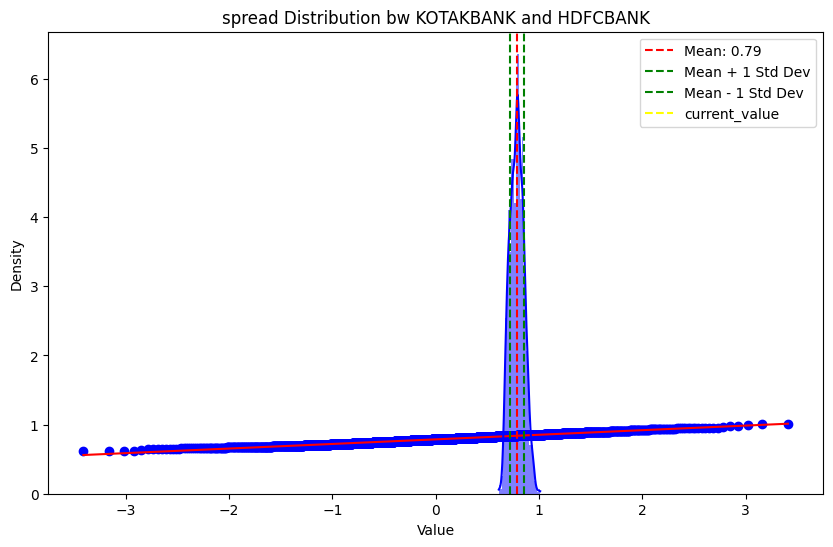

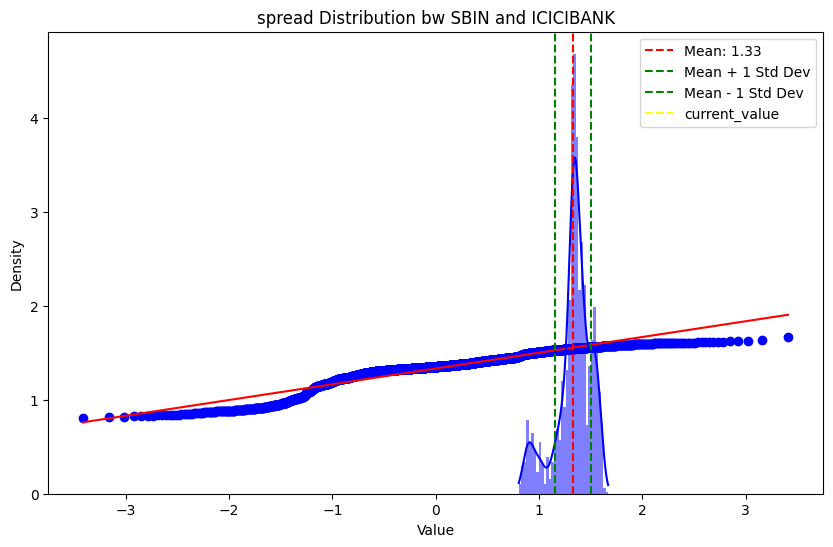

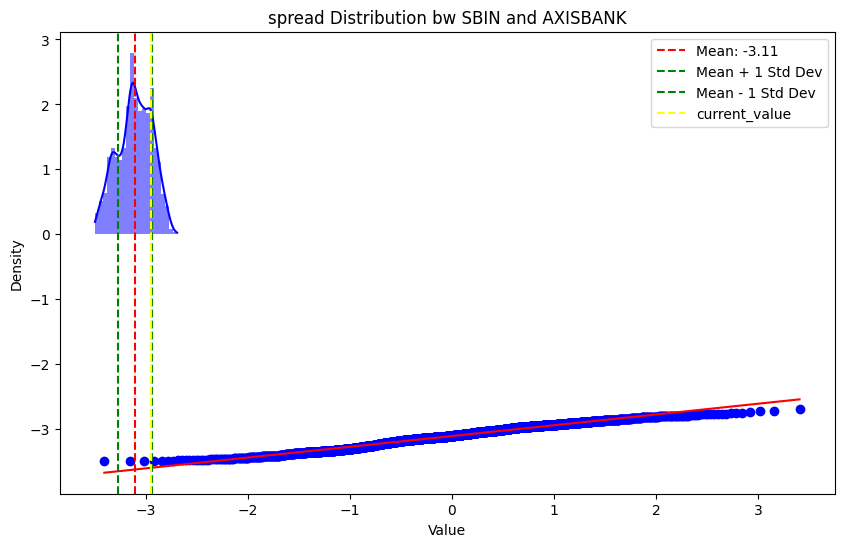

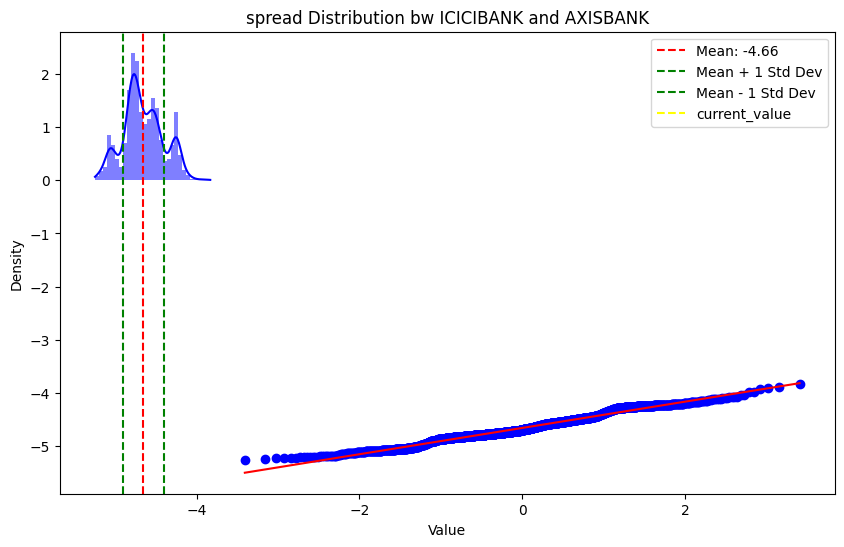

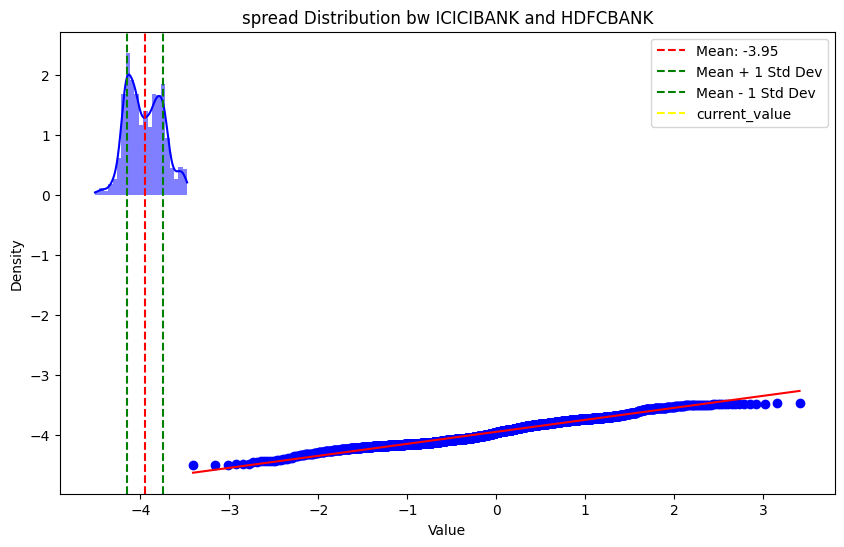

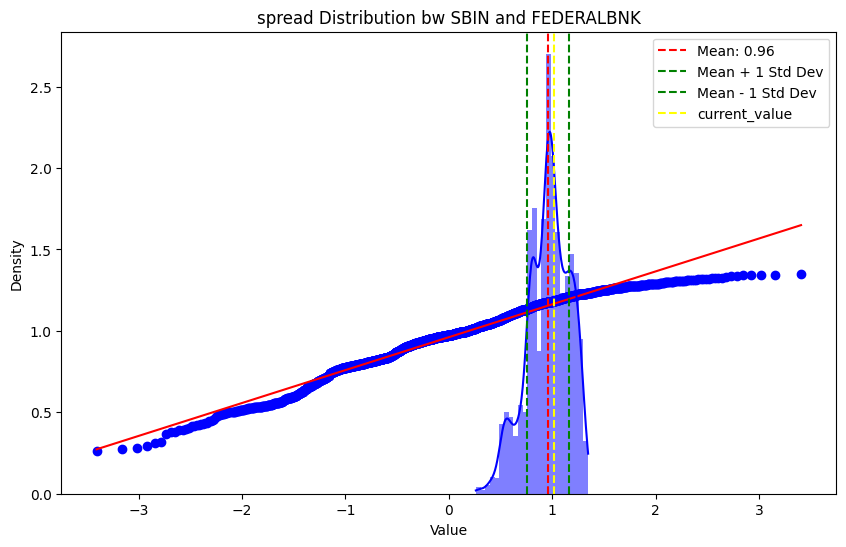

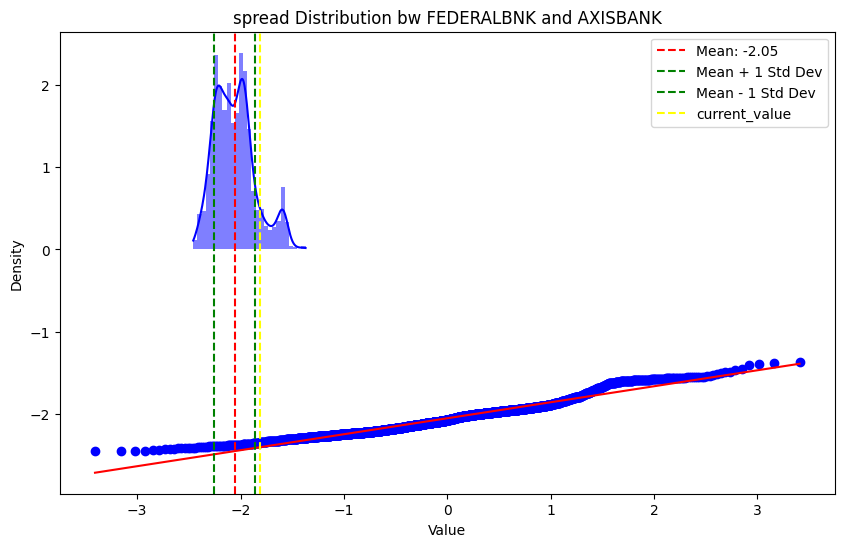

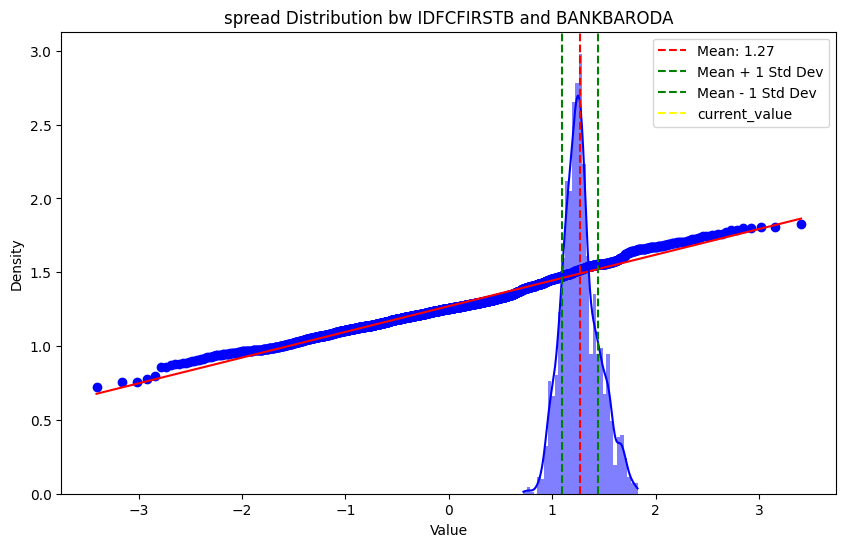

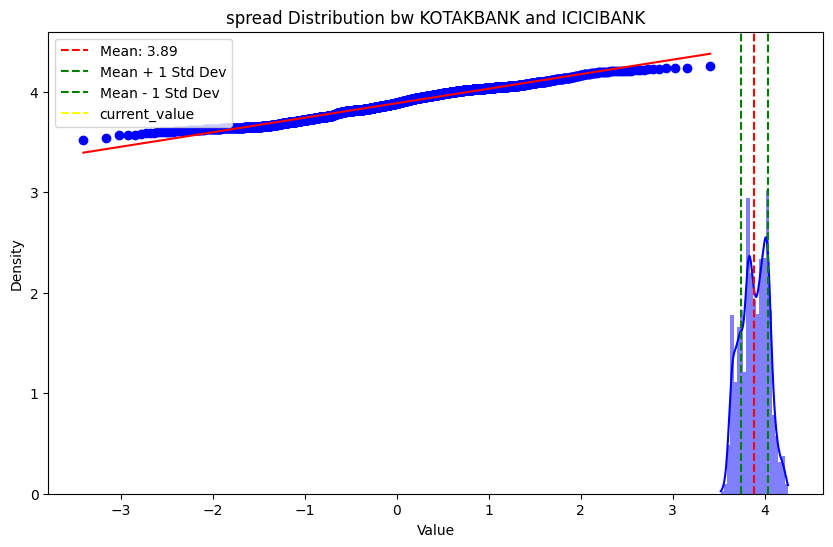

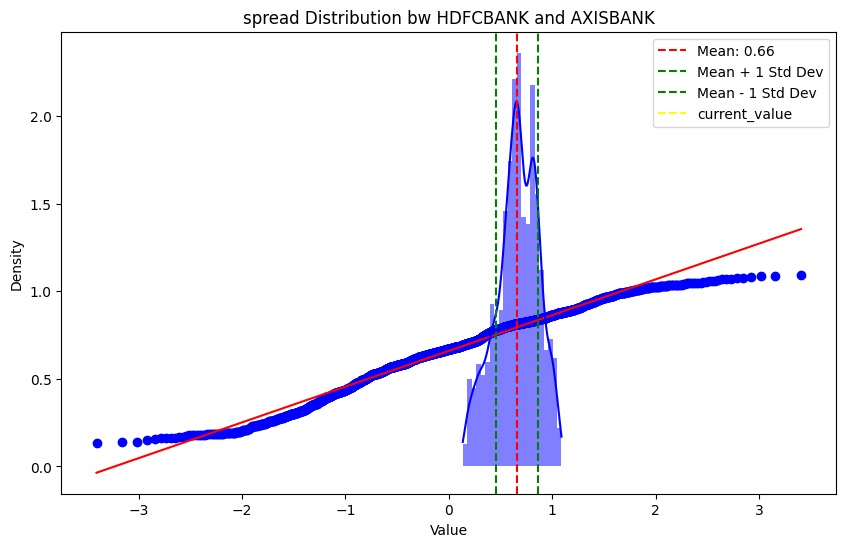

In [93]:


import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math



for i in range(len(hedge_ratio_dataframe)):


  log_prices_A = df_concat_log[hedge_ratio_dataframe.iloc[i,0]]
  log_prices_B = df_concat_log[hedge_ratio_dataframe.iloc[i,1]]
  # Hedge ratio
  n = hedge_ratio_dataframe.iloc[i,2]
  current_price_A=ltp_df[ltp_df['symbol']==hedge_ratio_dataframe.iloc[i,0]]['ltp']
  current_price_B=ltp_df[ltp_df['symbol']==hedge_ratio_dataframe.iloc[i,1]]['ltp']
  print(current_price_A,current_price_B)
  # Calculate the spread
  spread = log_prices_A - n * log_prices_B
  current_spread=math.log(current_price_A)-n*math.log(current_price_B)


  mean=np.mean(spread)
  std_dev=np.std(spread)
  z_score_of_current_spread=(current_spread-mean)/std_dev
  print(z_score_of_current_spread)



  # Example data
  data = spread

  # Create a histogram and a density plot
  plt.figure(figsize=(10, 6))

  # Q-Q plot
  stats.probplot(data, dist="norm", plot=plt)
  plt.title(f'Q-Q Plot for {hedge_ratio_dataframe.iloc[i,0]} and {hedge_ratio_dataframe.iloc[i,1]}')
  # plt.show()
  # Plot histogram
  sns.histplot(data, kde=True, color='blue', stat='density', linewidth=0)

  # Plot the mean and standard deviation
  plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
  plt.axvline(mean + std_dev, color='green', linestyle='--', label=f'Mean + 1 Std Dev')
  plt.axvline(mean - std_dev, color='green', linestyle='--', label=f'Mean - 1 Std Dev')
  plt.axvline(current_spread, color='yellow', linestyle='--', label=f'current_value')

  plt.title(f'spread Distribution bw {hedge_ratio_dataframe.iloc[i,0]} and {hedge_ratio_dataframe.iloc[i,1]}')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.legend()

  # plt.show()


In [ ]:
import math

print(current_spread)

z_score_of_current_spread=(current_spread-mean)/std_dev
print(z_score_of_current_spread)